Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: e1071


Attaching package: ‘e1071’


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness


Rows: 12189 Columns: 104
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Restaurant_Name, Web_Link, Locality, Sponsored, Ratings_out_of_5, ...
dbl (87): Wine and Beer, Dance Floor, Lunch Menu, Outdoor Seating, Seaside, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 104
  Restaurant_Name Web_Link Locality Sponsored Ratings_out_of_5 `Number of votes`
  <chr>           <chr>    <chr>    <chr>                <dbl>             <dbl>
1 AB's - Absolut… https:/… Hinjawa… Casual D…              4.9              7029
2 Cafe Co2 Resto… https:/… Bhugaon  Lounge, …              4.6              2578
# ℹ 98 more variables: Phone_number <chr>, Cuisines <chr>,
#   Charges_for_two <dbl>, payment_modes <chr>, Rest_timming <chr>,
#   Detail_address <chr>, `5_star_review_percentage` <dbl>,
#   `4_star_review_percentage` <dbl>, `3_star_review_percentage` <dbl>,
#   `2_star_review_percentage` <dbl>, `1_star_review_percentage` <dbl>,
#   `Wine and Beer` <dbl>, `Dance Floor` <dbl>, `Lunch Menu` <dbl>,
#   `Outdoor Seating` <dbl>, Seaside <dbl>, `4/5 Star` <dbl>, …

Each row in the dataset represents a restaurant in Pune, including its features, reviews, and ratings.

Research Question: What is the relationship between the price range of a restaurant (Cha

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 11 rows containing missing values or values outside the scale range (`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 11 rows containing missing values or values outside the scale range (`geom_smooth()`).”
Saving 6.67 x 6.67 in image
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Computation failed in `stat_bin()`.
Caused by error in `bin_breaks_bins()`:
! `bins` must be a whole number, not a double vector.”
Warning message:
“Computation failed in `stat_bin()`.
Caused by error in `bin_breaks_bins()`:
! `bins` must be a whole number, not a double vector.”


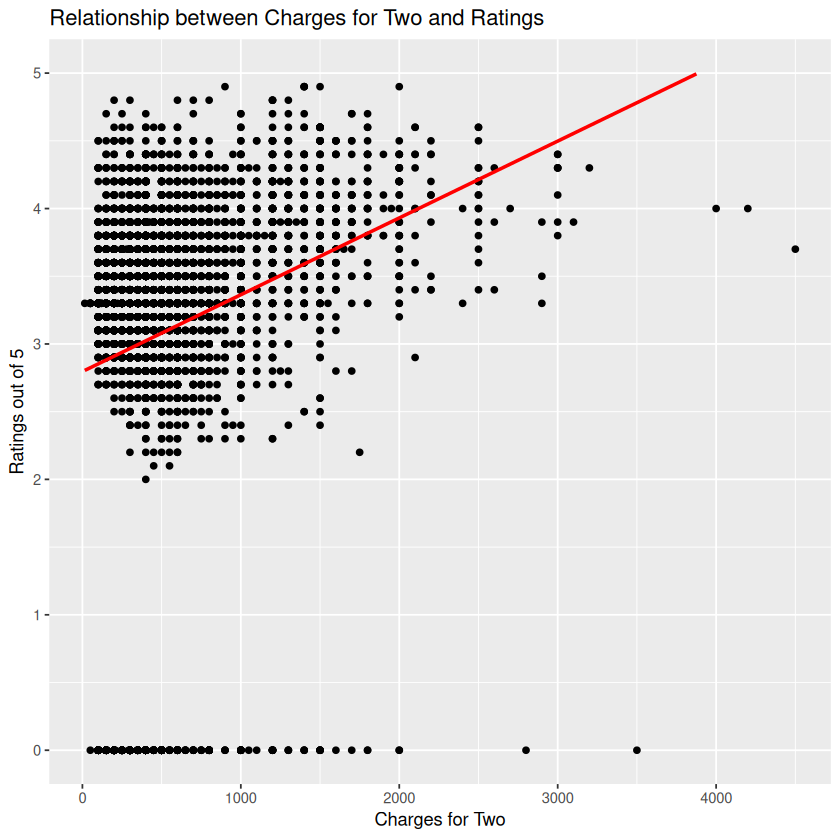

Histogram interpretation: The histogram shows a left-skewed distribution of restaurant ratings. The density curve helps visualize the overall shape of the distribution.
Pearson Correlation Coefficient between Ratings and Charges: 0.178317847031298 
Correlation Interpretation: There is a statistically significant weak positive correlation between charges and ratings. 
P-value: 1.25734076669045e-87 


Saving 6.67 x 6.67 in image


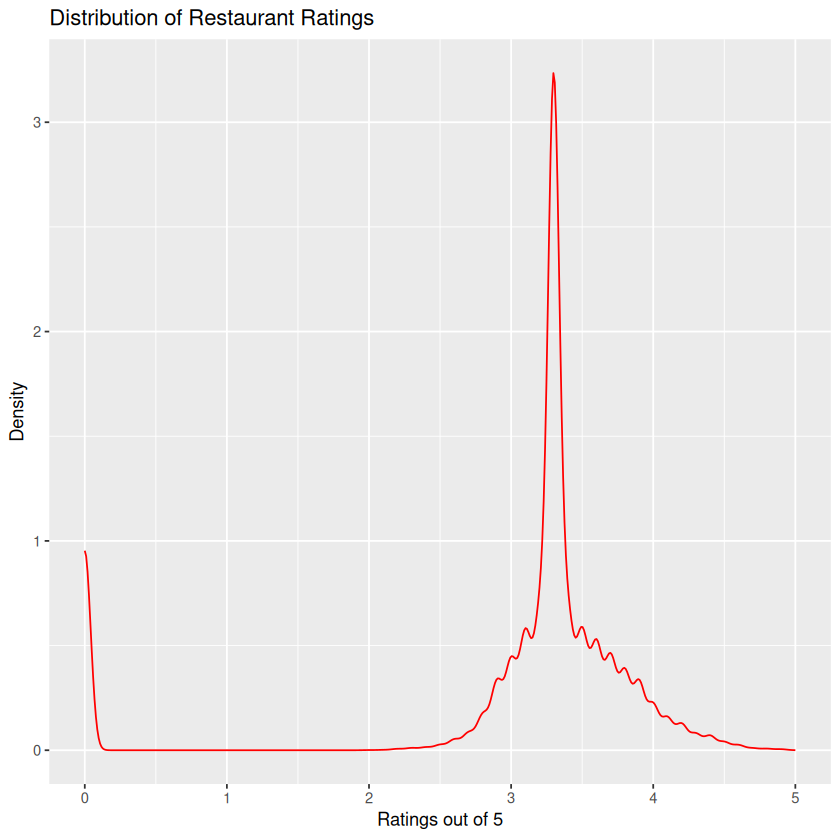

Saving 6.67 x 6.67 in image


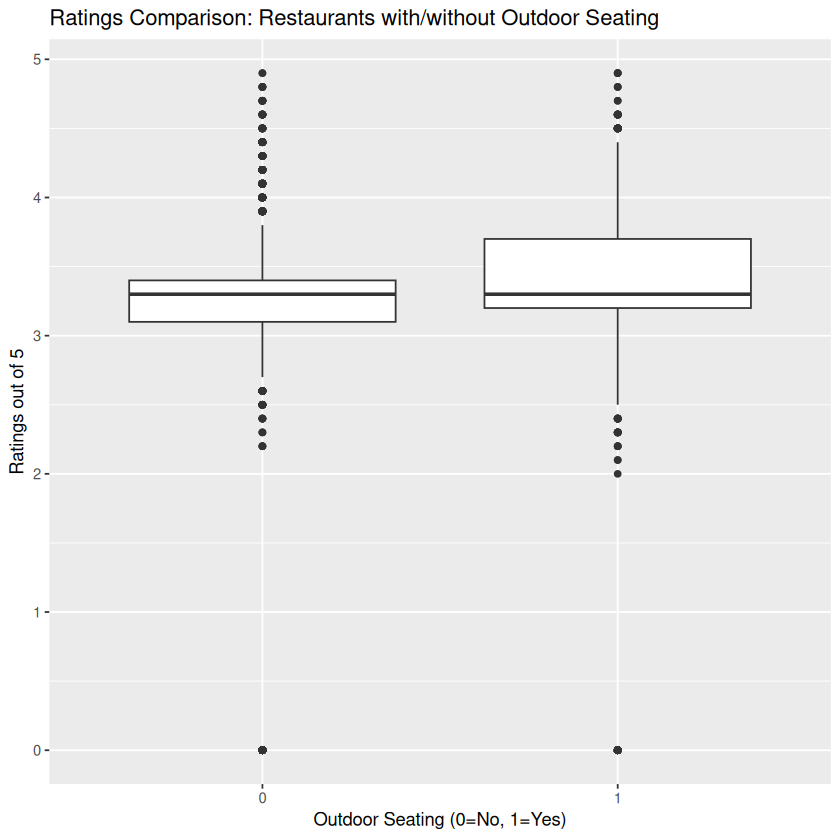

Pearson Correlation Coefficient: 0.178317847031298 
P-value: 1.25734076669045e-87 


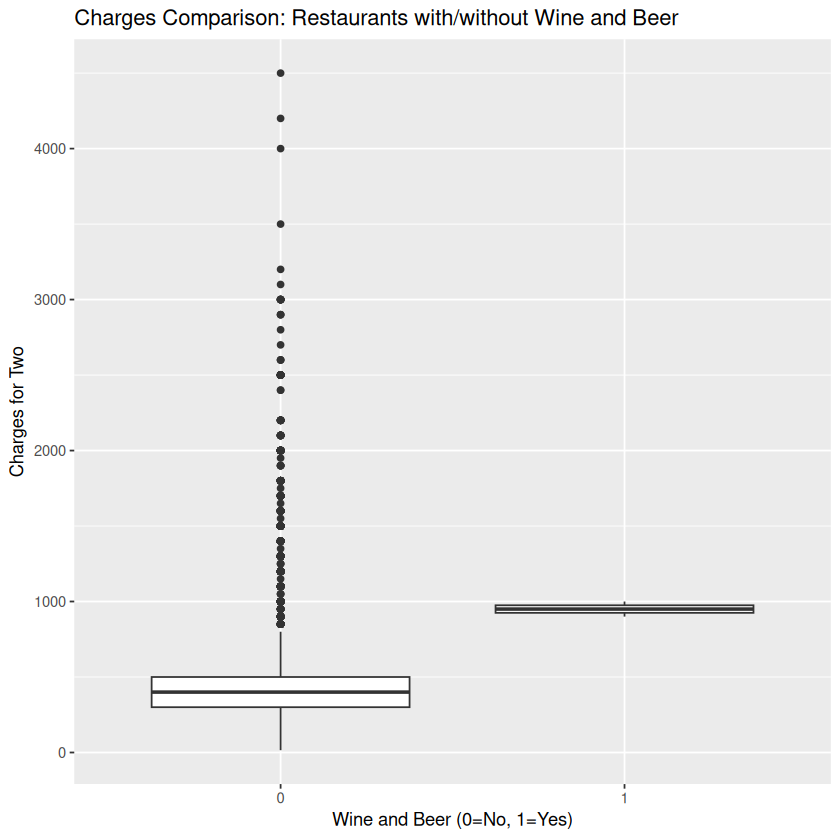

In [10]:
# Install required packages if not already installed
if(!require(dplyr)){install.packages("dplyr")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(readr)){install.packages("readr")}
if(!require(corrplot)){install.packages("corrplot")}
if(!require(e1071)){install.packages("e1071")}

# Load libraries
library(dplyr)
library(ggplot2)
library(readr)
library(corrplot)
library(e1071)

# --- 1. Dataset Loading and Initial Cleaning ---

df <- read_csv("zomato_pune_V002.csv")

# Convert relevant columns to numeric (some are characters but should be numeric)
numeric_cols <- c('Ratings_out_of_5', 'Number of votes', 'Charges_for_two',
                  '5_star_review_percentage', '4_star_review_percentage',
                  '3_star_review_percentage', '2_star_review_percentage',
                  '1_star_review_percentage')

df <- df %>%
  mutate(across(all_of(numeric_cols), ~as.numeric(gsub("[^0-9.]", "", .))))

# Handle missing values (using median imputation)
df <- df %>%
  mutate(across(all_of(numeric_cols), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))


# Display first two rows of data for report
head(df, 2) %>% print()

# Dataset Row Representation
cat("\nEach row in the dataset represents a restaurant in Pune, including its features, reviews, and ratings.\n")


# --- Outlier Removal (Charges_for_two based on 4 standard deviations) ---
mean_charges <- mean(df$Charges_for_two)
std_charges <- sd(df$Charges_for_two)
cutoff <- 4 * std_charges

lower_limit <- mean_charges - cutoff
upper_limit <- mean_charges + cutoff

df <- df %>%
  filter(Charges_for_two >= lower_limit & Charges_for_two <= upper_limit)

# --- 2. Research Question & Hypotheses Formulation ---
research_question <- "What is the relationship between the price range of a restaurant (Charges_for_two) and its customer rating (Ratings_out_of_5) in Pune, based on Zomato data? Is there a statistically significant correlation between these two variables?"
null_hypothesis <- "There is no statistically significant correlation between a restaurant's Charges_for_two and its Ratings_out_of_5 in Pune."
alternative_hypothesis <- "There is a statistically significant correlation between a restaurant's Charges_for_two and its Ratings_out_of_5 in Pune."

cat(paste("\nResearch Question:", research_question, "\n"))
cat(paste("Null Hypothesis:", null_hypothesis, "\n"))
cat(paste("Alternative Hypothesis:", alternative_hypothesis, "\n"))

# --- 3. Data Visualization ---

# 3a. Scatterplot of Charges_for_two vs Ratings_out_of_5
scatter_plot <- ggplot(df, aes(x = Charges_for_two, y = Ratings_out_of_5)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Relationship between Charges for Two and Ratings",
       x = "Charges for Two",
       y = "Ratings out of 5") +
  ylim(0, 5)  # Set y-axis limits to 0-5
ggsave("scatterplot_charges_ratings.png", plot=scatter_plot)
print(scatter_plot)



# 3b. Histogram of Ratings
histogram_plot <- ggplot(df, aes(x = Ratings_out_of_5)) +
  geom_histogram(aes(y = ..density..), bins = seq(0, 5.5, 0.5), fill = "skyblue", color = "black") +
  geom_density(color = "red") +
   labs(title = "Distribution of Restaurant Ratings",
       x = "Ratings out of 5",
       y = "Density") +
    xlim(0,5) # set x-axis limits 0-5

ggsave("histogram_ratings.png", plot=histogram_plot)
print(histogram_plot)


# 3c. Interpret histogram
ratings_skewness <- skewness(df$Ratings_out_of_5)

if (ratings_skewness > 0.5) {
  histogram_interpretation <- "The histogram shows a right-skewed distribution of restaurant ratings."
} else if (ratings_skewness < -0.5) {
  histogram_interpretation <- "The histogram shows a left-skewed distribution of restaurant ratings."
} else if (kurtosis(df$Ratings_out_of_5) > 3) {
    histogram_interpretation <- "The histogram shows a leptokurtic distribution with heavy tails"
}else if (kurtosis(df$Ratings_out_of_5) < 3) {
      histogram_interpretation <- "The histogram shows a platykurtic distribution with thin tails"
} else {
  histogram_interpretation <- "The histogram shows an approximately normal distribution of restaurant ratings."
}

cat(paste("Histogram interpretation:", histogram_interpretation, "The density curve helps visualize the overall shape of the distribution.\n"))



# --- 4. Statistical Analysis ---

# 4a. Calculate correlation coefficient
correlation_result <- cor.test(df$Ratings_out_of_5, df$Charges_for_two, method = "pearson")
correlation <- correlation_result$estimate
p_value <- correlation_result$p.value

cat(paste("Pearson Correlation Coefficient between Ratings and Charges:", correlation, "\n"))


# 4b. Programmatic Interpretation of Correlation
alpha <- 0.05

if (p_value < alpha) {
  if (correlation > 0.5) {
    interpretation <- "There is a statistically significant strong positive correlation between charges and ratings."
  } else if (correlation > 0.3) {
    interpretation <- "There is a statistically significant moderate positive correlation between charges and ratings."
  } else if (correlation > 0) {
    interpretation <- "There is a statistically significant weak positive correlation between charges and ratings."
  } else if (correlation < -0.5) {
      interpretation <- "There is a statistically significant strong negative correlation between charges and ratings."
  } else if (correlation < -0.3) {
    interpretation <- "There is a statistically significant moderate negative correlation between charges and ratings."
  } else {
      interpretation <- "There is a statistically significant weak negative correlation between charges and ratings."
  }
} else {
    interpretation <- "There is no statistically significant correlation between charges and ratings."
}

cat(paste("Correlation Interpretation:", interpretation, "\n"))
cat(paste("P-value:", p_value, "\n"))


# --- 5. Additional Analysis and Visualization ---
#5a. Box Plot: Ratings vs Outdoor Seating
boxplot_outdoor <- ggplot(df, aes(x = factor(`Outdoor Seating`), y = Ratings_out_of_5)) +
    geom_boxplot() +
    labs(title = "Ratings Comparison: Restaurants with/without Outdoor Seating",
         x = "Outdoor Seating (0=No, 1=Yes)",
         y = "Ratings out of 5")
ggsave("boxplot_outdoor_seating.png", plot=boxplot_outdoor)
print(boxplot_outdoor)

#5b. Box Plot: Charges vs Wine and Beer
boxplot_wine <- ggplot(df, aes(x = factor(`Wine and Beer`), y = Charges_for_two)) +
    geom_boxplot() +
    labs(title = "Charges Comparison: Restaurants with/without Wine and Beer",
         x = "Wine and Beer (0=No, 1=Yes)",
         y = "Charges for Two")
ggsave("boxplot_wine_beer.png", plot=boxplot_wine)
print(boxplot_wine)

# Print the correlation and p value
cat(paste("Pearson Correlation Coefficient:", correlation, "\n"))
cat(paste("P-value:", p_value, "\n"))